# 본 자료는 다음의 자료를 참고하였습니다

https://github.com/airobotlab/KoChatGPT

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 사전작업: Colab 환경 설정

In [2]:
## setup( < 5 mins)
## 중간에 에러가 나도 괜찮습니다.
!pip uninstall torch -y
!pip install torch==1.13.1+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1+cu116 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1+cu116 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1+cu116 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 1.13.1+cu116 which is incompatible.


In [3]:
## Torch 버전이 1.13.1 인지 확인

import torch

print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:2.0.1+cu118
cuda version: 11.8
cudnn version:8700


In [4]:
# 필수 라이브러리 설치
# 중간에 에러가 보여도 괜찮습니다
!pip install transformers
!pip install accelerate

!pip install colossalai==0.2.7
!pip install openai
!pip install langchain==0.0.113
!pip install pandas>=1.4.1
!pip install datasets
!pip install jsonlines
!pip install loralib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.7/686.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.0/396.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.20
    Uninstalling SQLAlchemy-2.0.20:
      Successfully uninstalled SQLAlchemy-2.0.20
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.49 which is incompatibl

In [ ]:
# github 코드 클론은 한번만!!
%cd /content/drive/MyDrive/
!git clone https://github.com/oglee815/mygpt-lecture.git

/content/drive/MyDrive
fatal: destination path 'mygpt-lecture' already exists and is not an empty directory.
/content/drive/MyDrive/mygpt-lecture


In [6]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead
from copy import deepcopy
from torch.optim import Adam
from transformers import AutoTokenizer, BloomTokenizerFast
from transformers.models.gpt2.tokenization_gpt2 import GPT2Tokenizer
import pandas as pd
import argparse
import copy
import logging
import json
from dataclasses import dataclass, field


import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

### KoGPT2 테스트

In [7]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2').to('cuda')

print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']


In [8]:
# data config
IGNORE_INDEX = -100
DEFAULT_PAD_TOKEN = tokenizer.pad_token #"[PAD]"
DEFAULT_EOS_TOKEN = tokenizer.eos_token # "</s>"
DEFAULT_BOS_TOKEN = tokenizer.bos_token #"</s>"
DEFAULT_UNK_TOKEN = tokenizer.unk_token # "</s>"

In [9]:
## 추론 테스트
generator_skt_gpt = pipeline('text-generation', model=model, tokenizer=tokenizer, device=model.device)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = [ '동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']

print(list_prompt)
list_result = generator_skt_gpt(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print(('#'*70))
    print(('completion:\n%s'%(result[0]['generated_text'])))

['동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']
######################################################################
completion:
동해물과 백두산이 만나는 곳인데요.
이곳을 찾는 관광객은 지난해보다 3배 가까이 늘었습니다.
김진아 기자가 취재했습니다.
서울의 한 대형 마트.
지난해보다 2배 이상 늘어난 하루 평균 2천여 명이 이곳을 찾았습니다.
올해는 예년보다 더 많은 인파가 몰릴 것으로 예상돼, 쇼핑객들의 발길도 이어질 전망입니다.
한강 수변공원을 찾은 관광객은 지난해에 비해 40%나 늘었습니다.
특히 올해는 미세먼지가 심했던 지난해와 달리 올해는 중국발 스모그가 유입되지 않아 대기 질이 크게 개선됐습니다.
KBS 뉴스 김진아입니다. 서울중앙지법 형사합의22부(부장판사 김세윤)는 이날 오전 10시 30분 특정범죄가중처벌법상 알선수재 등 혐의로 기소된 조 전 부사장에 대한 첫 공판준비기일을 진행한다.
조 전 부사장은 지난해 7월21일 미국 뉴욕 JFK공항에서 탑승 게이트로 향하던 대한항공 KE086편 항공기에서 승무원에게 폭언과 폭행을 가한 혐의(항공보안법상 항공기항로변경죄)를 받는다.
당시 조 전 부사장은 승무원들에게 욕설과 함께 욕설을 퍼부으며 소란을 피운 것으로 조사됐다.
조 전 부사장의 변호인은 "승무원의 진술
######################################################################
completion:
불고기 요리 만드는 방법 알려줘요.
요거 ♀
#먹스타그램 #foodie #follow #like4like #소통 #좋아요
#팔로우 #맞팔 #선팔 #일상 #데일리 #daily #selfie #instafood #f4f #l4l #lfl #fff #ootd #오오티디 #셀피 #셀카 #얼스타그램 <18.03.07.Sun> #편의점 #세븐일레븐 #신상 #초코크림치즈케이크 (₩1500) + #바삭한 #크림치즈의 조합이 너무 맛있어

### General Instruction Model 테스트

In [10]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained('hyunjae/skt-kogpt2-kullm-v2').to('cuda')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [11]:
## 추론 테스트
generator_general_model = pipeline('text-generation', model=model, tokenizer=tokenizer, device=model.device)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = [ '동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']

PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"
prompt_list = [ PROMPT.format_map({'instruction':x}) for x in list_prompt]

list_result = generator_general_model(prompt_list, **generation_args)
for prompt, result in zip(prompt_list, list_result):
    print(('#'*70))
    print(('completion:\n%s'%(result[0]['generated_text'])))

######################################################################
completion:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:동해물과 백두산이
### 응답:물론이죠! 다음은 두 산의 이름입니다:

1. 북극해 - 북극해는 북대서양에 위치한 섬나라로 북반구에 위치하고 있습니다. 이 섬은 따뜻한 기후, 높은 습도, 낮은 기온으로 유명합니다.
######################################################################
completion:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:불고기 요리를 만드는 간단한 레시피를 소개합니다:

재료
- 불고기 1 파운드
- 다진 큰 양파 1개
- 다진 마늘 2쪽
- 올리브 오일 2 큰술
- 맛볼 소금과 후추
- 서빙용 신선한 바질 잎

지침
1. 큰 냄비나 더치 오븐에 올리브 오일을 두르고 중간 불에 올립니다.
2. 양파와 마늘을 넣고 부드러워질 때까지 약 5분간 조리합니다.
3. 다진 마늘을 넣고 향이 날 때까지 약 2분간 조리합니다.
4. 4. 원하는 경우 소금과 후추로 간을 맞춥니다.
5. 5. 뜨겁게 제공합니다. 맛있게 드세요!


### Stage 1-1 Domain Adaptive Pre-training

In [12]:
train_dataset = SFT_dataset(data_path='/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_ive_pretrain.jsonl', tokenizer=tokenizer)
eval_dataset  = None  # eval은 안함
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 사실대로 말해주세요.
주제:아이브의 개요

### 응답:
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.</s>
Tokenizing inputs... This may take some time...


In [14]:
# train_dataset 내용 확인
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(train_dataset[0]['input_ids'])))

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 사실대로 말해주세요.
주제:아이브의 개요

### 응답:2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.</s>


In [15]:
output_dir="/content/drive/MyDrive/mygpt-lecture/output/domain_adaptive_model"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs= 30,
    gradient_accumulation_steps= 1,
    learning_rate=3e-5,
    per_device_train_batch_size= 6,
    logging_steps=1,
    prediction_loss_only=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [ ]:
trainer.train()
trainer.save_model(output_dir)

Step,Training Loss
1,5.218700
2,4.664300
3,5.123100
4,4.929800
5,3.917400
6,4.090200
7,3.898800
8,4.218800
9,3.409800
10,4.065600


#### General Model vs Domain Adaptive Pretraining Model 추론 테스트

In [ ]:
## 추론 테스트
# Domain 정보가 없는 모델
generator_general = pipeline('text-generation', model="hyunjae/skt-kogpt2-kullm-v2", tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=128,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

In [ ]:
# 제너럴 모델은 특정 도메인에 대해서 학습하지 않아도 잘 알까?
PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

list_prompt = ['불고기 요리 만드는 방법 알려줘', '아이브는 총 몇명이야?']
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]

print(list_prompt)
list_result = generator_general(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print(('#'*70))
    print(('completion: %s'%(result[0]['generated_text'])))

['### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:불고기 요리 만드는 방법 알려줘\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브는 총 몇명이야?\n### 응답:']
######################################################################
completion: ### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:불고기 요리는 다음과 같은 방법으로 만들 수 있습니다:

1. **재료 준비하기: 불고기 1파운드
2. **스테이크 만들기: 스테이크를 팬에 넣고 중간 불에서 갈색이 될 때까지 약 5분간 조리합니다.
3. **불고기 소스 추가하기: 스테이크에 소금과 후추로 간을 합니다.
4. **불고기를 프라이팬에 넣기: 스테이크 위에 소스를 골고루 펴 바릅니다.
5. **소스가 완전히 익었는지 확인합니다: 스테이크의 바닥이 노릇노릇해질 때까지 약 10~15분간 조리합니다.
6. **불을 끄
######################################################################
completion: ### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 총 몇명이야?
### 응답:죄송하지만 저는 인공지능 언어 모델이기 때문에 실시간 데이터에 액세스할 수 있는 기능이 없습니다. 제가 도와드릴 수 있는 다른 것이 있나요?


In [ ]:
## 추론 테스트, domain_adaptive_model
## 도메인 정보를 학습시킨 모델
generator_general_domain_adaptive = pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=128,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

In [ ]:
# 특정 도메인에 대해서 사전학습 된 모델의 성능을 알아보자!
list_prompt =['불고기 요리 만드는 방법 알려줘', '아이브는 총 몇명이야?']
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]

print(list_prompt)
list_result = generator_general_domain_adaptive(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print(('#'*70))
    print(('completion: %s'%(result[0]['generated_text'])))

['### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:불고기 요리 만드는 방법 알려줘\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브는 총 몇명이야?\n### 응답:']
######################################################################
completion: ### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:불고기 요리는 주로 소고기, 돼지고기, 닭고기, 칠면조 등의 고기를 사용하여 만듭니다.

재료
- 갈은 소고기 1파운드
- 얇게 썬 적 양파 1개
- 올리브 오일 2 큰술
- 소금과 후추, 맛보기
- 다진 마늘 2쪽
- 간 생강 1인치
- 고수 가루 1작은술
- 맛볼 소금과 후추
- 고춧가루 약간

만드는 방법
1. 큰 프라이팬에 올리브 오일을 두르고 중간 불에 올립니다.
2. 양파, 마늘, 생강을 넣고 향이 날 때까지 약 5분간 볶습니다.
3. 3. 갈은 소고기와 돼지고기를 팬에
######################################################################
completion: ### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 총 몇명이야?
### 응답:2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.


### Stage 1-2 SFT 훈련

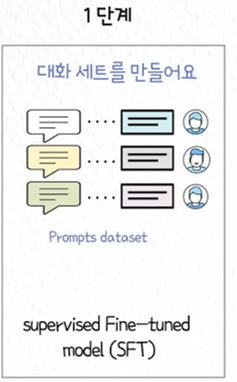

### ▶ Goal
- 인간의 지시를 이해 할 수 있는 언어 모델 학습(Instruction Fine-tuning)

### ▶ 준비물
- 엄청 큰 사전 학습된 언어 모델(GPT 3.5, 175B)
- 인간이 직접 한 땀 한 땀 만든 정성스레 만든 ‘지시-응답‘ 데이터셋
(Demonstration Dataset)

### ▶ 학습 방법
- 입력에 대해 정답의 확률을 높이는 Supervised Fine-tuning (입력: 지시, 정답: 응답, Loss function: Cross-entropy loss)

### ▶ 특징
- 간단하지만, 데이터 생성에 비용이 많이 듦


In [17]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead
from copy import deepcopy
from torch.optim import Adam
from transformers import AutoTokenizer, BloomTokenizerFast
from transformers.models.gpt2.tokenization_gpt2 import GPT2Tokenizer
import pandas as pd
import argparse
import copy
import logging
import json
from dataclasses import dataclass, field

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines


In [40]:
# 아까 학습한 Domain Adaptive Pretraining이 된 모델로 학습
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained("/content/drive/MyDrive/mygpt-lecture/output/domain_adaptive_model").to('cuda')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [21]:
# instruction dataset 로드
train_dataset = SFT_dataset(data_path='/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl', tokenizer=tokenizer)
eval_dataset  = SFT_dataset(data_path='/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 어떤 소속사에 소속되어 있나요?
### 응답:
아이브는 스타쉽엔터테인먼트에 소속되어 있습니다.</s>
Tokenizing inputs... This may take some time...


### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 소속사는 어떤 엔터테인먼트 기업인가요?
### 응답:
아이브의 소속사는 스타쉽엔터테인먼트입니다.</s>
Tokenizing inputs... This may take some time...


In [20]:
# train_dataset 내용 확인
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(train_dataset[0]['input_ids'])))

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 어떤 소속사에 소속되어 있나요?
### 응답:아이브는 스타쉽엔터테인먼트에 소속되어 있습니다.</s>


In [30]:
TrainingArguments?

In [41]:
output_dir="/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs= 15,
    gradient_accumulation_steps= 1,
    learning_rate=5e-6,
    per_device_train_batch_size= 6,
    per_device_eval_batch_size= 6,
    eval_steps=30,
    evaluation_strategy='steps',
    logging_steps=1,
    prediction_loss_only=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [42]:
trainer.train()
trainer.save_model(output_dir)

Step,Training Loss,Validation Loss
30,1.524100,1.485685
60,1.595500,1.388912
90,1.227800,1.376454
120,0.892200,1.357110
150,0.888600,1.359608
180,0.780800,1.365041
210,0.878800,1.369765
240,0.476800,1.374832
270,0.407300,1.374895
300,0.554700,1.380907


TrainOutput(global_step=570, training_loss=0.7902483180688139, metrics={'train_runtime': 75.0462, 'train_samples_per_second': 44.573, 'train_steps_per_second': 7.595, 'total_flos': 126842992128000.0, 'train_loss': 0.7902483180688139, 'epoch': 15.0})

In [43]:
trainer.save_model(output_dir)

In [44]:
## 추론 테스트
generator_instruction_tuning = pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

In [45]:
list_test = open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl", 'r')
test_data = [json.loads(x) for x in list_test]

In [46]:
test_data[1]

{'instruction': '장원영의 생년월일은 언제인가요?', 'output': '장원영의 생년월일은 2004년 8월 31일입니다.'}

In [47]:
PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

list_prompt = [ x['instruction'] for x in test_data]
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]
chatgpt_answer = [ x['output'] for x in test_data]

print(list_prompt)
list_result = generator_instruction_tuning(list_prompt, **generation_args)
for prompt, result, answer in zip(list_prompt, list_result, chatgpt_answer):
    print(('-'*70))
    print(prompt)
    print(('Model output: %s'%(result[0]['generated_text'].replace(prompt,""))))
    print("ChatGPT output:", answer)

['### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브의 소속사는 어떤 엔터테인먼트 기업인가요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:장원영의 생년월일은 언제인가요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브와 (여자)아이들은 어떤 차이점이 있나요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:어떤 멤버들이 IVE의 성장을 도왔나요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브의 실력 중에서 가장 특출난 점은 무엇인가요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브의 모든 멤버들이 곡의 스토리와 가사에 맞는 표정 연기를 잘 하나요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브의 메인보컬과 서브보컬은 누구들인가요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:아이브의 랩 파트와 고음역대 파트는 누가 맡고 있나요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:어떤 그룹이 처음부터 비주얼을 내세웠나요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:이 아티스트는 어떤 시상식에서 3개의 시상식에서 신인상과 대상을 동시 수상한 최초의 아티스트가 되었다고 언급되었나요?\n### 응답:', '### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:이 아티스트가 속한 그룹은 어떤 시기에 여자 아이돌 시장의 침체기를 가져온 걸그룹으로 꼽

### Stage 2. Rating Model 만들기

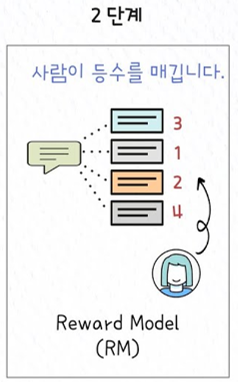


### ▶ Goal
- 모델의 응답에 대한 사람의 선호도 점수를 예측하는 Reward Model(RM) 학습


### ▶ 준비물
- Stage1에서 학습 된 SFT 모델
- 하나에 질문 당 여러개의 답변이 필요하며, 그 중 어떤 답변이 우수한지 체크되어 있어야 함

### ▶ 학습 방법
- 인간이 더 선호하는 답변의 점수를 높이도록 학습 (Pairwise Log Sigmoid)

### ▶ 특징
- 역시 사람이 많이 필요, 그러나 Stage 1보다는 훨씬 비용이 적게 듦.

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead
from copy import deepcopy
from torch.optim import Adam
from transformers import AutoTokenizer, BloomTokenizerFast
from transformers.models.gpt2.tokenization_gpt2 import GPT2Tokenizer
import pandas as pd
import argparse
import copy
import logging
import json
from dataclasses import dataclass, field
import argparse

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.models.bloom import BLOOMRM
from chatgpt.models.gpt import GPTRM
from chatgpt.models.opt import OPTRM
from chatgpt.trainer import RewardModelTrainer
from chatgpt.trainer.strategies import ColossalAIStrategy, DDPStrategy, NaiveStrategy
from datasets import load_dataset
from torch.optim import AdamW
from transformers import AutoTokenizer, BloomTokenizerFast
from transformers.models.gpt2.tokenization_gpt2 import GPT2Tokenizer

from colossalai.nn.optimizer import HybridAdam

import os
import json


/usr/local/lib/python3.10/dist-packages/torch/library.py:130: UserWarning: Overriding a previously registered kernel for the same operator and the same dispatch key
  operator: aten::index.Tensor(Tensor self, Tensor?[] indices) -> Tensor
    registered at aten/src/ATen/RegisterSchema.cpp:6
  dispatch key: Meta
  previous kernel: registered at ../aten/src/ATen/functorch/BatchRulesScatterOps.cpp:1053
       new kernel: registered at /dev/null:241 (Triggered internally at ../aten/src/ATen/core/dispatch/OperatorEntry.cpp:150.)
  self.m.impl(name, dispatch_key, fn)


In [2]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

# data config
# data config
IGNORE_INDEX = -100
DEFAULT_PAD_TOKEN = tokenizer.pad_token # "[PAD]"
DEFAULT_EOS_TOKEN = tokenizer.eos_token
DEFAULT_BOS_TOKEN = tokenizer.bos_token
DEFAULT_UNK_TOKEN = tokenizer.unk_token

PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:{output}"

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [3]:
from transformers import AutoModelForCausalLM, AutoConfig
from chatgpt.models.gpt.gpt_rm import GPTRM
model = GPTRM(pretrained="/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning").to('cuda')

In [4]:
train_rm=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage2. RM/ive_train_rm.jsonl", 'r'):
    train_rm.append(json.loads(a))

test_rm=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage2. RM/ive_test_rm.jsonl", 'r'):
    test_rm.append(json.loads(a))

In [5]:
train_rm[-1]

{'prompt': 'LOVE DIVE 활동 이전에는 모든 멤버가 어떤 종류의 활동명을 사용했나요?',
 'chosen': '성씨를 제외한 본명 및 예명',
 'rejected': ' LOVE DIVE 활동 이전에는 멤버들은 다른 종류의 활동명을 사용하지 않았습니다.'}

In [6]:
print("Train set size:", len(train_rm))
print("Test set size:", len(test_rm))

Train set size: 227
Test set size: 21


In [7]:
len(test_rm)

21

In [8]:
# System Prompt를 추가합니다.
train = [{'prompt':"### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:"+a['prompt']+"\n### 응답:", 'chosen':a['chosen'], 'rejected':a['rejected']} for a in train_rm]
test = [{'prompt':"### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:"+a['prompt']+"\n### 응답:", 'chosen':a['chosen'], 'rejected':a['rejected']} for a in test_rm]
train_dataset = RewardDataset(train, tokenizer, 256)
eval_dataset = RewardDataset(test, tokenizer, 256)

100%|██████████| 21/21 [00:00<00:00, 1649.26it/s]


In [24]:
!rm -rf /content/drive/MyDrive/mygpt-lecture/output/rm_model

In [9]:
rm_output_path="/content/drive/MyDrive/mygpt-lecture/output/rm_model/"
if not os.path.exists(rm_output_path):
    os.makedirs(rm_output_path)

In [10]:
strategy = NaiveStrategy()

In [12]:
optim = AdamW(model.parameters(), lr=1e-5)

In [17]:
trainer = RewardModelTrainer(model=model,
                             strategy=strategy,
                             optim=optim,
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=8,
                             max_epochs=2)

In [18]:
# train!!
trainer.fit(use_lora=0)

Train step of epoch 0: 100%|██████████| 29/29 [00:23<00:00,  1.23it/s, loss=0.00438, dist_mean=7.78]

Train epoch: 100%|██████████| 2/2 [00:47<00:00, 23.57s/it]


In [19]:
torch.save(model.state_dict(), rm_output_path + "/pytorch_model.bin")
model.model.save_pretrained(rm_output_path)  # config.json 생성

In [20]:
# 보상모델 체크
def inference_RM(input_text=None):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]
    return output_reward

In [21]:
# Test 데이터셋 에 대해 Accuracy 측정해보기
correct = 0
for a in test:
    input_text = a['prompt'] + a['chosen']
    print("--------------")
    print("@ 좋은 답변")
    output_reward_good = inference_RM(input_text=input_text)
    print(input_text,output_reward_good)

    input_text =a['prompt'] + a['rejected']

    output_reward_bad = inference_RM(input_text=input_text)
    print("@ 나쁜 답변")
    print(input_text, output_reward_bad)

    if output_reward_good > output_reward_bad:
        correct +=1

--------------
@ 좋은 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 멤버중 가장 나이가 많은 멤버는 누구인가요?
### 응답:이서  1.2149022
@ 나쁜 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 멤버중 가장 나이가 많은 멤버는 누구인가요?
### 응답: 아이브의 멤버 중 가장 나이가 많은 멤버는 당신에게는 알려지지 않습니다. 0.49292395
--------------
@ 좋은 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 멤버중 가장 소극적인 성격을 가진 멤버는 누구인가요?
### 응답:리즈  1.1187627
@ 나쁜 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 멤버중 가장 소극적인 성격을 가진 멤버는 누구인가요?
### 응답: 아이브의 멤버 중 가장 소극적인 성격을 가진 멤버는 당신에게는 알려지지 않습니다. 0.28171083
--------------
@ 좋은 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:걸 크러시 콘셉트와 아이브의 이미지는 어떻게 다른가요?
### 응답:걸 크러시 콘셉트는 파워풀하고 섹시한 이미지를 지향하는 반면, 아이브는 '소녀'라는 정체성을 유지하면서 '자기애'라는 이미지를 곁들인 차별적인 콘셉트를 가지고 있습니다. -1.0854094
@ 나쁜 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:걸 크러시 콘셉트와 아이브의 이미지는 어떻게 다른가요?
### 응답: 걸 크러시 콘셉트와 아이브의 이미지는 성격이 비슷하지만, 아이브는 더 성숙하고 세련된 이미지를 갖고 있습니다. -1.0964613
--------------
@ 좋은 답변
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:앞서 언급한 두 

In [22]:
correct/len(test)

0.9047619047619048

### Stage 3. PPO 학습

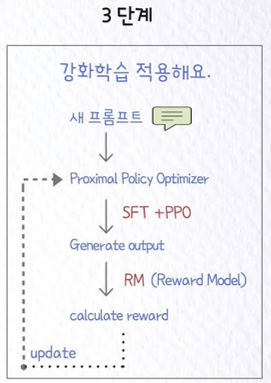


### ▶ Goal
- RM과 SFT를 활용하여 강화학습 적용하기  최적화 된 ChatGPT 탄생

### ▶ 준비물
- Stage1에서 학습 된 SFT 모델, Stage2에서 학습 된 RM 모델
- 이전 Stage에서 사용되지 않은 새로운 지시(질문)들

### ▶ 학습 방법
- PPO Algorithm(강화학습 알고리즘의 한 종류)

### ▶ 특징
- 유일하게 사람의 레이블링 작업이 필요 없는 Stage. Stage2, 3는 반복 적용 가능


In [1]:
# import
import argparse
from copy import deepcopy

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

import pandas as pd
import torch
torch.cuda.empty_cache()
from chatgpt.models.base import RewardModel
from chatgpt.models.bloom import BLOOMActor, BLOOMCritic
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.models.opt import OPTActor, OPTCritic
from chatgpt.trainer import PPOTrainer
from chatgpt.trainer.strategies import ColossalAIStrategy, DDPStrategy, NaiveStrategy
from torch.optim import AdamW
from transformers import AutoTokenizer, BloomTokenizerFast
from transformers.models.gpt2.tokenization_gpt2 import GPT2Tokenizer

from colossalai.nn.optimizer import HybridAdam
from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

import json
import os

/usr/local/lib/python3.10/dist-packages/torch/library.py:130: UserWarning: Overriding a previously registered kernel for the same operator and the same dispatch key
  operator: aten::index.Tensor(Tensor self, Tensor?[] indices) -> Tensor
    registered at aten/src/ATen/RegisterSchema.cpp:6
  dispatch key: Meta
  previous kernel: registered at ../aten/src/ATen/functorch/BatchRulesScatterOps.cpp:1053
       new kernel: registered at /dev/null:241 (Triggered internally at ../aten/src/ATen/core/dispatch/OperatorEntry.cpp:150.)
  self.m.impl(name, dispatch_key, fn)


In [2]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)
# data config
IGNORE_INDEX = -100
DEFAULT_PAD_TOKEN = tokenizer.pad_token # "[PAD]"
DEFAULT_EOS_TOKEN = tokenizer.eos_token
DEFAULT_BOS_TOKEN = tokenizer.bos_token
DEFAULT_UNK_TOKEN = tokenizer.unk_token

PROMPT= "### system:당신은 IVE 덕후입니다. IVE에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


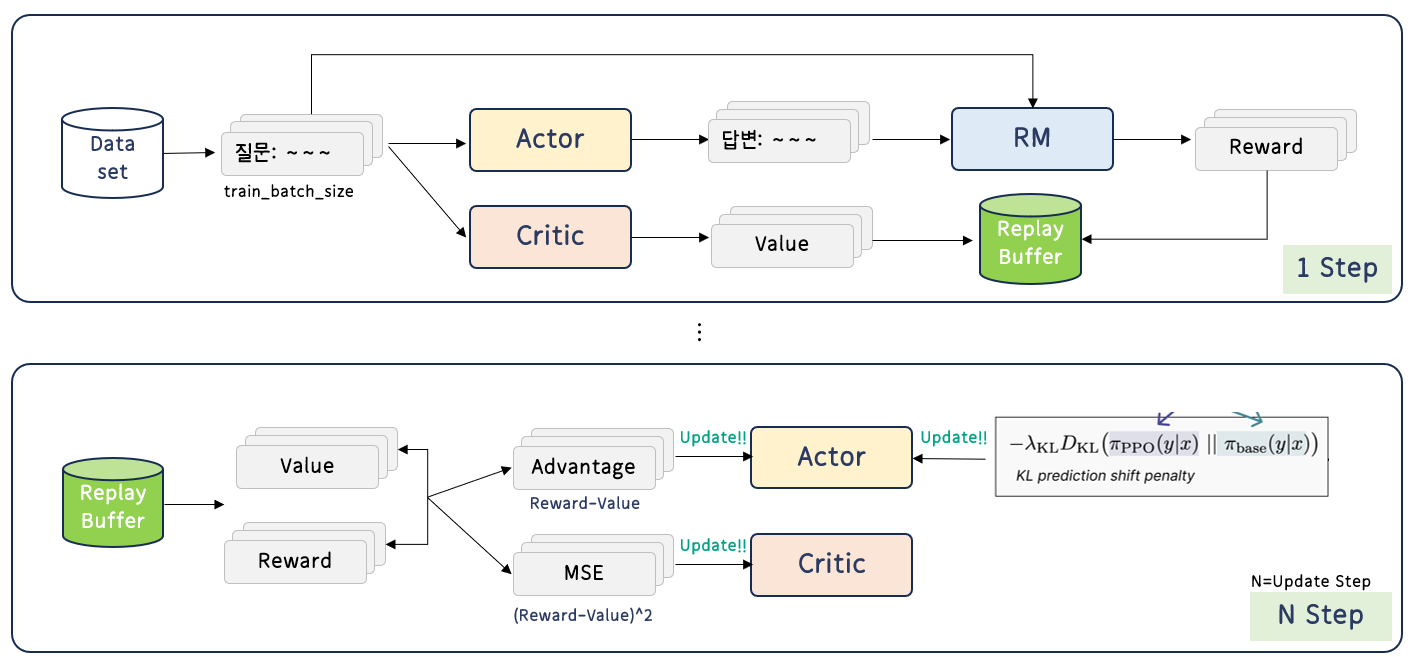

In [3]:
# define argment
parser = argparse.ArgumentParser()
parser.add_argument('--train_data_path_ppo', type=str, default='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl')
parser.add_argument('--test_data_path_ppo', type=str, default='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl')
parser.add_argument('--output_dir', type=str, default='/content/drive/MyDrive/mygpt-lecture/output/PPO_model2')
parser.add_argument('--model', type=str, default='gpt2')
parser.add_argument('--pretrain', type=str, default=None)
parser.add_argument('--num_episodes', type=int, default=5)
parser.add_argument('--max_timesteps', type=int, default=6)
parser.add_argument('--update_timesteps', type=int, default=3)
parser.add_argument('--max_epochs', type=int, default=1)
parser.add_argument('--train_batch_size', type=int, default=6)
parser.add_argument('--lora_rank', type=int, default=0) # 0 = 사용안함
parser.add_argument('--max_length', type=int, default=256)
parser.add_argument('--lr', type=float, default=3e-6)

parser.add_argument('--pretrain_actor', type=str, default='/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning/')  # SFT 모델 가져오기
parser.add_argument('--pretrain_critic', type=str, default='/content/drive/MyDrive/mygpt-lecture/output/rm_model') # RM 모델 가져오기
args = parser.parse_args(args=[])

print(args)
if not os.path.exists(args.output_dir):
    os.makedirs(args.output_dir)

Namespace(train_data_path_ppo='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl', test_data_path_ppo='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl', output_dir='/content/drive/MyDrive/mygpt-lecture/output/PPO_model2', model='gpt2', pretrain=None, num_episodes=5, max_timesteps=6, update_timesteps=3, max_epochs=1, train_batch_size=6, lora_rank=0, max_length=256, lr=3e-06, pretrain_actor='/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning/', pretrain_critic='/content/drive/MyDrive/mygpt-lecture/output/rm_model')


In [4]:
# configure strategy
strategy = NaiveStrategy()

In [5]:
# configure model, tokenizer
with strategy.model_init_context():
    actor = GPTActor(pretrained=args.pretrain_actor).to(torch.cuda.current_device())
    critic = GPTCritic(pretrained=args.pretrain_critic).to(torch.cuda.current_device())
    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

In [6]:
# configure optimizer
actor_optim = AdamW(actor.parameters(), lr=args.lr)
critic_optim = AdamW(critic.parameters(), lr=args.lr)

In [7]:
# setting the models
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = strategy.prepare(
    (actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

In [8]:
train_ppo=[]
for a in open(args.train_data_path_ppo, 'r'):
    train_ppo.append(PROMPT.format_map({'instruction':json.loads(a)['prompt']}))

test_ppo=[]
for a in open(args.test_data_path_ppo, 'r'):
    test_ppo.append(PROMPT.format_map({'instruction':json.loads(a)['prompt']}))

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=args.max_length, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.items()}

In [9]:
# Dataset Size
print("Train set Size:", len(train_ppo))
print("Test set Size:",len(test_ppo))

Train set Size: 452
Test set Size: 48


In [10]:
train_ppo[0]

'### system:당신은 IVE 덕후입니다. IVE에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:아이브는 어떤 기간에 데뷔했나요?\n### 응답:'

In [11]:
# configure trainer
trainer = PPOTrainer(strategy,
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=args.max_epochs,
                     train_batch_size=6,
                     tokenizer=tokenize_fn,
                     max_length=args.max_length,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

## train!
trainer.fit(train_ppo,  # 입력 prompt
            num_episodes=args.num_episodes,
            max_timesteps=args.max_timesteps,
            update_timesteps=args.update_timesteps)

Episode [5/5]: 100%|██████████| 6/6 [02:22<00:00, 23.83s/it]


In [12]:
torch.save(actor.state_dict(), args.output_dir + "/pytorch_model.bin")
actor.model.save_pretrained(args.output_dir)  # config.json 생성

#### SFT vs PPO Inference 비교

In [13]:
generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

In [18]:
!rm -rf /content/drive/MyDrive/mygpt-lecture/output/PPO_model

In [14]:
# 두가지 모델로 추론 결과를 뽑습니다. (시간 소요)

from transformers import pipeline

## PPO
generator_ppo = pipeline('text-generation', model=args.output_dir , tokenizer=tokenizer)
list_result_ppo = generator_ppo(test_ppo, **generation_args)

## SFT
generator_sft = pipeline('text-generation', model=args.pretrain_actor, tokenizer=tokenizer)
list_result_sft = generator_sft(test_ppo, **generation_args)

In [16]:
for prompt, ppo_result, sft_result in zip(test_ppo, list_result_ppo, list_result_sft):
    print(('-'*70))
    print(prompt)
    print("PPO: ",ppo_result[0]['generated_text'].replace(prompt,""))
    print("SFT: ",sft_result[0]['generated_text'].replace(prompt,""))

----------------------------------------------------------------------
### system:당신은 IVE 덕후입니다. IVE에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.
### 사용자:이서가 여행을 가면 가장 가고 싶은 곳은 어디인가요?
### 응답:
PPO:  이서는 서브보컬 및 리드댄서입니다.
SFT:  안유진
----------------------------------------------------------------------
### system:당신은 IVE 덕후입니다. IVE에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.
### 사용자:IVE의 콘셉트가 걸 그룹의 이미지와 관련하여 어떤 변화를 가져올 수 있을까요?
### 응답:
PPO:  IVE는 걸 크러시 콘셉트를 기반으로 소녀 이미지와 자기애를 결합한 차별화된 콘셉트를 시도할 수 있습니다.
SFT:  IVE는 걸 크러시 콘셉트를 기반으로 소녀 이미지와 자기애를 결합한 차별화된 콘셉트를 시도할 수 있습니다.
----------------------------------------------------------------------
### system:당신은 IVE 덕후입니다. IVE에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.
### 사용자:IVE의 콘셉트와 음악은 어떤 시대를 연상시키나요?
### 응답:
PPO:  IVE는 걸 크러시 콘셉트를 기반으로 소녀 이미지와 자기애를 결합한 차별화된 콘셉트를 시도합니다.
SFT:  IVE는 걸 크러시를 표방한 콘셉트와 음악 스타일로 어필합니다.
----------------------------------------------------------------------
### system:당신은 IVE 덕후입니다. IVE에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.
### 사용자:IVE의 음악이 다른 걸 크러시 콘셉트 걸 그룹들과 달라보이는 점은 무엇인

#### Pipeline 없이 Inference 하는 법

In [ ]:
## inference
def generation(model, input_text):
    input_ids = tokenizer(input_text, return_tensors='pt').to(
        torch.cuda.current_device())

    outputs = model.generate(**input_ids,
                             num_beams=4,
                            repetition_penalty=2.0,
                            no_repeat_ngram_size=4,
                            eos_token_id=tokenizer.eos_token_id,
                            max_new_tokens=256,
                            do_sample=True,
                            top_k=50,
                            early_stopping=True
                             )

    # print(outputs)
    output = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    print('#' * 70)
    print(output)
    return output

from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(args.output_dir).to('cuda').eval()

for input_text in test_ppo:
    output = generation(model, input_text)

######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:국선도는 어떤 사람들에게 추천되는 수련법인가요?\n### 응답:국선도(밝돌법)는 사람들이 수련하여 건강해질 수 있는 수련법이다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:밝돌법이라는 이름의 유래는 무엇인가요?\n### 응답:도인도송 내용에서 국선도법(밝돌법)은 인도송 내용에서 유래했습니다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:국선도를 통해 건강한 몸을 유지하는 방법은 무엇인가요?\n### 응답:국선도에서 건강한 몸을 유지하는 방법에는 여러 가지가 있습니다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:국선도를 수행하는 데 필요한 시간과 노력은 어느 정도인가요?\n### 응답:국선도의 수행을 위해서는 중기단법(中氣丹法), 건곤단법(乾坤丹法), 진공단법(眞空丹法)이 필요합니다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선

In [ ]:
!rm -rf /content/drive/MyDrive/KoChatGPT/temp/